# Customer Relationship Management (CRM)

## Customer Segmentation with RFM
___

**Business Problem: There is an e-commerce company and this company want to segments it's customers for develop marketing strategy** 
___

__Variables__

Invoice: Unique number for each invoice. If invoice number starts with 'C', it's mean this invoice cancelled.

StockCode: Unique number for each product.

Description: Prooduct name.

Quantity: Indicates how many units of the product were sold.

InvoiceDate: Invoice date.

Price: Product price for each units. (Sterling)

CustumerID: Unique ID for each customer.

Country: Customer country.

**Import Libraries**

In [74]:
import datetime as dt
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.3f' %x)

**Read Excel File**

In [75]:
df_ = pd.read_excel('crm_analytics/datasets/online_retail_II.xlsx', sheet_name='Year 2009-2010')

In [225]:
df = df_.copy()

## Understanding Data

**First 15 rows**

In [77]:
df.head(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.650,13085.000,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.950,13085.000,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.550,13085.000,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.750,13085.000,United Kingdom


**Check units and columns**

In [78]:
df.shape

(525461, 8)

**Check null units for each columns**

In [79]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

**Check the unique values for each variables**

In [80]:
df.nunique()

Invoice        28816
StockCode       4632
Description     4681
Quantity         825
InvoiceDate    25296
Price           1606
Customer ID     4383
Country           40
dtype: int64

**Add 'TotalPrice' to dataframe.**

TotalPrice = Quantity x UnitPrice

In [81]:
df['TotalPrice'] = df['Quantity'] * df['Price']

In [82]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom,83.400
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom,100.800
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom,30.000


## Data Preparation

**Remove null units from dataframe**

In [83]:
df.shape

(525461, 9)

In [84]:
df.dropna(inplace=True)

In [85]:
df.shape

(417534, 9)

**Deleting cancalled invoice**

In [86]:
df = df[~df['Invoice'].str.contains('C', na=False)]

In [87]:
df.shape

(407695, 9)

In [88]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom,83.400
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom,100.800
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom,30.000


## Calculating RMF Metrics

**RFM Metrics**

Recency: how long ago they made a purchase. 

Frequency: how often they make purchases.

Monetary: how much money they spend.

In [210]:
df['InvoiceDate'].max()

Timestamp('2010-12-09 20:01:00')

In [90]:
today_date = dt.datetime(2010, 12, 11)

In [150]:
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (today_date - x.max()).days,
                              'Invoice': lambda x: x.nunique(),
                              'TotalPrice': lambda x: x.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']

In [151]:
rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346.000,165,11,372.860
12347.000,3,2,1323.320
12348.000,74,1,222.160
12349.000,43,3,2671.140
12351.000,11,1,300.930


In [152]:
rfm.shape

(4314, 3)

In [153]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4314.000,91.270,96.944,1.000,18.000,53.000,136.000,374.000
frequency,4314.000,4.454,8.169,1.000,1.000,2.000,5.000,205.000
monetary,4314.000,2047.289,8912.523,0.000,307.950,705.550,1722.802,349164.350


**Deleting monetary values equal to zero from rfm dataframe.**

In [154]:
rfm = rfm[rfm['monetary'] > 0]

In [155]:
rfm.shape

(4312, 3)

In [156]:
rfm.describe()

,recency,frequency,monetary
count,4312.000,4312.000,4312.000
mean,91.173,4.456,2048.238
std,96.861,8.170,8914.481
min,1.000,1.000,2.950
25%,18.000,1.000,307.988
50%,53.000,2.000,706.020
75%,136.000,5.000,1723.142
max,374.000,205.000,349164.350


## Calculating RMF Scores

In [174]:
rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

In [175]:
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

In [176]:
rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [177]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
Customer ID,,,,,,
12346.000,165,11,372.860,2,5,2
12347.000,3,2,1323.320,5,2,4
12348.000,74,1,222.160,2,1,1
12349.000,43,3,2671.140,3,3,5
12351.000,11,1,300.930,5,1,2


In [190]:
rfm['RFM Score'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)

In [191]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM Score
Customer ID,,,,,,,
12346.000,165,11,372.860,2,5,2,25
12347.000,3,2,1323.320,5,2,4,52
12348.000,74,1,222.160,2,1,1,21
12349.000,43,3,2671.140,3,3,5,33
12351.000,11,1,300.930,5,1,2,51


## Creating and Analysing RFM Segments

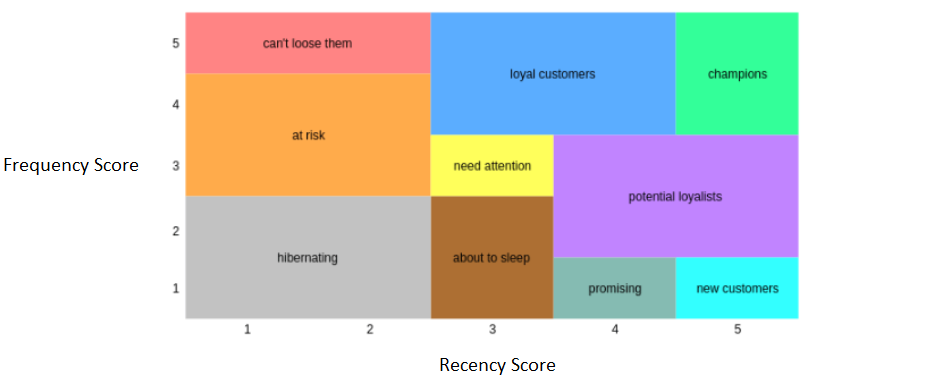

In [203]:
seg_map = {r'[1-2][1-2]': 'hibernating',
          r'[1-2][3-4]': 'at risk',
          r'[1-2]5': 'cant lose them',
          r'3[1-2]': 'about to sleep',
          r'33': 'need attention',
          r'[3-4][4-5]': 'loyal customers',
          r'41': 'promising',
          r'[4-5][2-3]': 'potential loyallists',
          r'51': 'new_customers',
          r'5[4-5]': 'champions'}

In [204]:
rfm['segments'] = rfm['RFM Score'].replace(seg_map, regex=True)

In [205]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM Score,segments
Customer ID,,,,,,,,
12346.000,165,11,372.860,2,5,2,25,cant lose them
12347.000,3,2,1323.320,5,2,4,52,potential loyallists
12348.000,74,1,222.160,2,1,1,21,hibernating
12349.000,43,3,2671.140,3,3,5,33,need attention
12351.000,11,1,300.930,5,1,2,51,new_customers


In [220]:
rfm.groupby('segments').describe()

recency                                                \
                        count    mean    std    min     25%     50%     75%   
segments                                                                      
about to sleep        343.000  53.819 10.286 37.000  45.000  53.000  64.000   
at risk               611.000 152.159 69.940 72.000  92.500 131.000 198.000   
cant lose them         77.000 124.117 49.925 72.000  88.000 109.000 137.000   
champions             663.000   7.119  4.620  1.000   3.000   7.000  11.000   
hibernating          1015.000 213.886 89.932 72.000 136.000 213.000 284.000   
loyal customers       742.000  36.287 16.073 16.000  23.000  31.000  50.000   
need attention        207.000  53.266  9.796 37.000  44.000  53.000  60.500   
new_customers          50.000   8.580  4.310  1.000   5.000   8.500  11.000   
potential loyallists  517.000  18.793  9.731  1.000  11.000  19.000  26.000   
promising              87.000  25.747  6.035 16.000  21.500  25.000  30.000   

                             frequency         ...                monetary  \
                         max     count   mean  ...    75%     max    count   
segments                                       ...                           
about to sleep        71.000   343.000  1.201  ...  1.000   2.000  343.000   
at risk              372.000   611.000  3.074  ...  4.000   6.000  611.000   
cant lose them       298.000    77.000  9.117  ...  9.000  46.000   77.000   
champions             15.000   663.000 12.554  ... 13.000 205.000  663.000   
hibernating          374.000  1015.000  1.126  ...  1.000   2.000 1015.000   
loyal customers       71.000   742.000  6.830  ...  8.000  42.000  742.000   
need attention        71.000   207.000  2.449  ...  3.000   3.000  207.000   
new_customers         15.000    50.000  1.000  ...  1.000   1.000   50.000   
potential loyallists  36.000   517.000  2.017  ...  3.000   3.000  517.000   
promising             36.000    87.000  1.000  ...  1.000   1.000   87.000   

                                                                            \
                         mean       std     min      25%      50%      75%   
segments                                                                     
about to sleep        441.320   416.673  24.400  194.125  317.760  535.275   
at risk              1188.878  1844.624  24.050  449.245  760.190 1376.575   
cant lose them       4099.450  5304.769 181.350 1698.560 2322.590 4009.660   
champions            6852.264 21556.377  75.760 1379.675 2508.320 4983.785   
hibernating           403.978   775.890   2.950  148.505  252.480  405.050   
loyal customers      2746.067  3256.543  97.400 1072.790 1821.385 3174.050   
need attention       1060.357  1189.804 101.100  471.470  742.900 1352.330   
new_customers         386.199   493.321  35.400  129.232  258.825  400.688   
potential loyallists  729.511   836.679  10.950  303.700  524.650  891.020   
promising             367.087   343.886  30.300  194.975  293.740  418.750   

                                 
                            max  
segments                         
about to sleep         3502.480  
at risk               34095.260  
cant lose them        26286.750  
champions            349164.350  
hibernating           11880.840  
loyal customers       50291.380  
need attention        13544.990  
new_customers          2945.380  
potential loyallists  12079.990  
promising              2389.620  

[10 rows x 24 columns]

In [223]:
rfm = rfm[['segments', 'recency', 'frequency', 'monetary']]
rfm

,segments,recency,frequency,monetary
Customer ID,,,,
12346.000,cant lose them,165,11,372.860
12347.000,potential loyallists,3,2,1323.320
12348.000,hibernating,74,1,222.160
12349.000,need attention,43,3,2671.140
12351.000,new_customers,11,1,300.930
...,...,...,...,...
18283.000,loyal customers,18,6,641.770
18284.000,about to sleep,67,1,461.680
18285.000,hibernating,296,1,427.000


## Functionalization of all steps

In [227]:
def create_rfm(dataframe, csv=False):
    
    # Data preparation      
    dataframe['TotalPrice'] = dataframe['Quantity'] * dataframe['Price']
    dataframe.dropna(inplace=True)
    dataframe = dataframe[~dataframe['Invoice'].str.contains('C', na=False)]
    
    # Calculating RMF metrics    
    max_day = dataframe['InvoiceDate'].max()
    today_date = dt.datetime(max_day.year, max_day.month, max_day.day+2)
    rfm = dataframe.groupby('Customer ID').agg({'InvoiceDate': lambda x: (today_date - x.max()).days,
                              'Invoice': lambda x: x.nunique(),
                              'TotalPrice': lambda x: x.sum()})

    rfm.columns = ['recency', 'frequency', 'monetary']
    rfm = rfm[rfm['monetary'] > 0]
    
    # Calculating RMF scores      
    rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
    rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
    rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])
    rfm['RFM Score'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)
    
    # Creating and analysing RFM segments    
    seg_map = {r'[1-2][1-2]': 'hibernating',
          r'[1-2][3-4]': 'at risk',
          r'[1-2]5': 'cant lose them',
          r'3[1-2]': 'about to sleep',
          r'33': 'need attention',
          r'[3-4][4-5]': 'loyal customers',
          r'41': 'promising',
          r'[4-5][2-3]': 'potential loyallists',
          r'51': 'new_customers',
          r'5[4-5]': 'champions'}
    
    rfm['segments'] = rfm['RFM Score'].replace(seg_map, regex=True)    
    rfm = rfm[['segments', 'recency', 'frequency', 'monetary']]
    rfm.index = rfm.index.astype(int)
    
    # Convert to csv
    rfm.to_csv('rfm.csv')
    
    return rfm  

In [228]:
test_df = df_.copy()

In [229]:
create_rfm(test_df, csv=False)

,segments,recency,frequency,monetary
Customer ID,,,,
12346,cant lose them,165,11,372.860
12347,potential loyallists,3,2,1323.320
12348,hibernating,74,1,222.160
12349,need attention,43,3,2671.140
12351,new_customers,11,1,300.930
...,...,...,...,...
18283,loyal customers,18,6,641.770
18284,about to sleep,67,1,461.680
18285,hibernating,296,1,427.000
